In [87]:
# Import standard libraries
import pandas as pd
import numpy as np

# Import the kmeans algorithm
from sklearn.cluster import KMeans

# Import functions created for this course
from functions import *

In [88]:
# Load the data from the csv file into a Pandas Dataframe
original_data = pd.read_csv('faodata.csv')
original_data.head()

Year              Country  Animal_Protein_Proportion  Protein_gr/cap/day  \
0  2021          Afghanistan                      17.27               60.70   
1  2021              Albania                      55.52              120.13   
2  2021              Algeria                      27.96               93.74   
3  2021               Angola                      29.76               46.78   
4  2021  Antigua and Barbuda                      70.27               89.45   

   Food supply (kcal/capita/day)  poultrymeat_domestic_supply_1000t  \
0                        2374.77                                 61   
1                        4520.92                                 63   
2                        3928.05                                258   
3                        2577.21                                286   
4                        3426.09                                  7   

   poultrymeat_export_1000t  poultrymeat_import_1000t  \
0                         0                        33   
1                         0                        48   
2                         0                         0   
3                         0                       246   
4                         0                         7   

   poultrymeat_production_1000t  deltapop%   2021_GDP_mil  GDP_delta_20-21  
0                            28   2.892393   14939.009447       -25.836857  
1                            14  -0.423461   18260.043500        20.672779  
2                           258   1.671512  163472.801517        12.164696  
3                            40   3.216657   70533.243177        28.660805  
4                             0   0.604360    1421.200000         3.710591

# K-means Clustering

#### K-means can only work with quantitative data, so we will remove country. In addition, "poultrymeat_domestic_supply_1000t" is also removed since it is the result of poultry export, import and production.

In [89]:
data = original_data.drop(columns=["Year","poultrymeat_domestic_supply_1000t"])
data = data.set_index('Country')
data.head()

Animal_Protein_Proportion  Protein_gr/cap/day  \
Country                                                              
Afghanistan                              17.27               60.70   
Albania                                  55.52              120.13   
Algeria                                  27.96               93.74   
Angola                                   29.76               46.78   
Antigua and Barbuda                      70.27               89.45   

                     Food supply (kcal/capita/day)  poultrymeat_export_1000t  \
Country                                                                        
Afghanistan                                2374.77                         0   
Albania                                    4520.92                         0   
Algeria                                    3928.05                         0   
Angola                                     2577.21                         0   
Antigua and Barbuda                        3426.09                         0   

                     poultrymeat_import_1000t  poultrymeat_production_1000t  \
Country                                                                       
Afghanistan                                33                            28   
Albania                                    48                            14   
Algeria                                     0                           258   
Angola                                    246                            40   
Antigua and Barbuda                         7                             0   

                     deltapop%   2021_GDP_mil  GDP_delta_20-21  
Country                                                         
Afghanistan           2.892393   14939.009447       -25.836857  
Albania              -0.423461   18260.043500        20.672779  
Algeria               1.671512  163472.801517        12.164696  
Angola                3.216657   70533.243177        28.660805  
Antigua and Barbuda   0.604360    1421.200000         3.710591

In [90]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)
x_scaled

array([[-1.70419554, -1.19149625, -1.52029286, ...,  1.58697369,
        -0.22563901, -4.06564001],
       [ 0.62179858,  1.33276075,  1.13000255, ..., -1.19863669,
        -0.22414936,  0.94554219],
       [-1.0541334 ,  0.21185982,  0.39786331, ...,  0.56132616,
        -0.15901426,  0.02883852],
       ...,
       [-1.43845452, -1.17450646, -1.53668008, ...,  0.9723613 ,
        -0.22787825, -0.67514941],
       [-1.00062033, -1.78443967, -1.50863534, ...,  1.57785711,
        -0.22277979,  0.62354158],
       [ 0.47038092, -1.32274232, -1.3858115 , ...,  0.89334518,
        -0.22152171, -0.06169791]])

#### We will ask for 3 clusters (the  n_clusters  parameter) and ask for clustering to be performed 10 times, starting with different centroids (this is the  n_init  parameter).  In this way, we can ask the algorithm to give us the best of the 10 runs.

In [91]:
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=3, n_init=10)

# Fit the data to the model
kmeans.fit(x_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(x_scaled)

#### Let's add a new column, cluster number to the original data so we can see which countries sit in what cluster:

In [93]:
# Add cluster number to the original data
x_scaled_clustered = pd.DataFrame(x_scaled, columns=data.columns, index=data.index)
x_scaled_clustered['cluster'] = clusters

x_scaled_clustered.head()

Animal_Protein_Proportion  Protein_gr/cap/day  \
Country                                                              
Afghanistan                          -1.704196           -1.191496   
Albania                               0.621799            1.332761   
Algeria                              -1.054133            0.211860   
Angola                               -0.944675           -1.782741   
Antigua and Barbuda                   1.518751            0.029644   

                     Food supply (kcal/capita/day)  poultrymeat_export_1000t  \
Country                                                                        
Afghanistan                              -1.520293                 -0.218306   
Albania                                   1.130003                 -0.218306   
Algeria                                   0.397863                 -0.218306   
Angola                                   -1.270298                 -0.218306   
Antigua and Barbuda                      -0.222011                 -0.218306   

                     poultrymeat_import_1000t  poultrymeat_production_1000t  \
Country                                                                       
Afghanistan                         -0.296307                     -0.261538   
Albania                             -0.223184                     -0.266646   
Algeria                             -0.457178                     -0.177623   
Angola                               0.742040                     -0.257160   
Antigua and Barbuda                 -0.423054                     -0.271754   

                     deltapop%  2021_GDP_mil  GDP_delta_20-21  cluster  
Country                                                                 
Afghanistan           1.586974     -0.225639        -4.065640        1  
Albania              -1.198637     -0.224149         0.945542        2  
Algeria               0.561326     -0.159014         0.028839        1  
Angola                1.859385     -0.200702         1.806212        1  
Antigua and Barbuda  -0.335176     -0.231702        -0.882049        2

### And...That's it! Really! We have performed a k-means clustering on our data

## Selecting the Number of Cluster, no magic number but we can run test using the Elbow Method.

#### The Elbow Method runs multiple tests with different values for k, the number of clusters.  For each run it records the score, which is a measure of the in-cluster variance (in other words how tight the clusters are).  We can then plot the score against the number of clusters. Let's do that with our data:

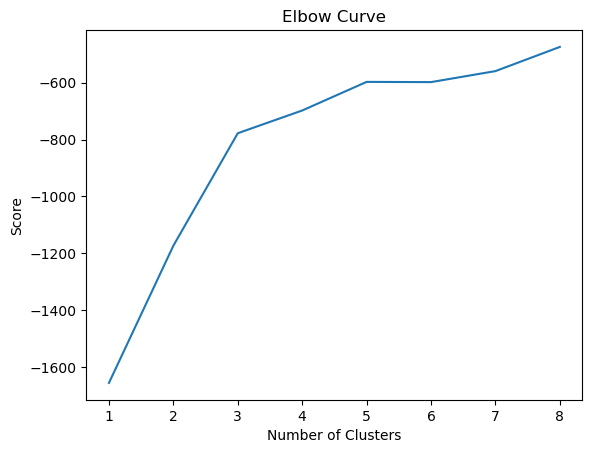

In [95]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 9
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=1) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(x_scaled).score(x_scaled) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Analyze the result

In [96]:
#### Note we are using PCA here to help visualize the results. It's not integral to the clustering method.

#### First, perform the PCA, asking for 3 principal components:

In [97]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 3 dimensions for visualization
pca = PCA(n_components=3)
pca.fit(x_scaled)

# Transfor the scaled data to the new PCA space
x_reduced = pca.transform(x_scaled)

#### We now have all our countries and the 9 variables mapped onto a 3D vector space.  We can quickly confirm this, showing the PCs and clusters against the countries:

In [98]:
# Convert to a data frame
x_reduceddf = pd.DataFrame(x_reduced, index=data.index, columns=['PC1','PC2','PC3'])
x_reduceddf['cluster'] = clusters
x_reduceddf.sort_values(by='cluster', ascending = False)

PC1        PC2       PC3  cluster
Country                                                                  
Latvia                             1.729307  -1.718023 -0.305388        2
Spain                              2.077377  -0.530530 -0.309791        2
Saint Lucia                        0.535808  -1.017643 -0.636539        2
Kazakhstan                         1.054317  -0.896190  0.023933        2
Saint Vincent and the Grenadines   0.836410  -1.164878 -1.463908        2
...                                     ...        ...       ...      ...
Guinea-Bissau                     -2.738441   1.181056  0.452975        1
Zimbabwe                          -1.624704   0.417064  0.058082        1
China, mainland                    8.039126   9.100856  3.380950        0
Brazil                             5.410097   5.538858 -3.091372        0
United States of America          10.266780  10.820582 -2.313210        0

[184 rows x 4 columns]

#### It would also be nice to show the cluster centers, but we need to apply the same PCA transformation that we gave to the actual data points, so that they can appear in the new 2 dimensional PCA space:

In [99]:
centres_reduced = pca.transform(kmeans.cluster_centers_)
centres_reduced

array([[ 7.90533453,  8.48676516, -0.67454431],
       [-1.65496196,  0.66987431, -0.06195812],
       [ 1.15965142, -0.82714146,  0.07312405]])

#### Now we can display the data points and centroids (as blue crosses):

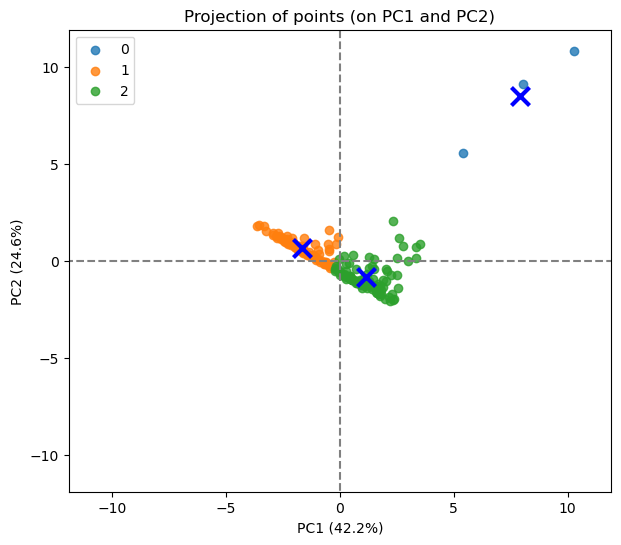

In [101]:
display_factorial_planes(x_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='b', zorder=10)

#### The 3 clusters and their centroids are clearly identified.

#### So there we have it. We have grouped our list of countries into 3 groups using the unsupervised k-means algorithm.

## Interpreting the clusters

#### But what do these clusters actually represent? The clustering algorithm has not given any indication as to what these 3 groups are. Unfortunately, there is no magic approach here. We need to examine the clusters and determine a sensible way to interpret them. This boils down to summarizing the samples within each cluster, or characterizing the clusters. Fortunately, we can use some tools to help us.

## Characterizing the Clusters

### Parallel coordinates plot

#### We can use a parallel coordinates plot to see how individual data points sit across all our variables. In the following chart, each color represents a different cluster. By looking at how the values for the variables compare across the clusters we can get a feel for what the clusters actually represent.

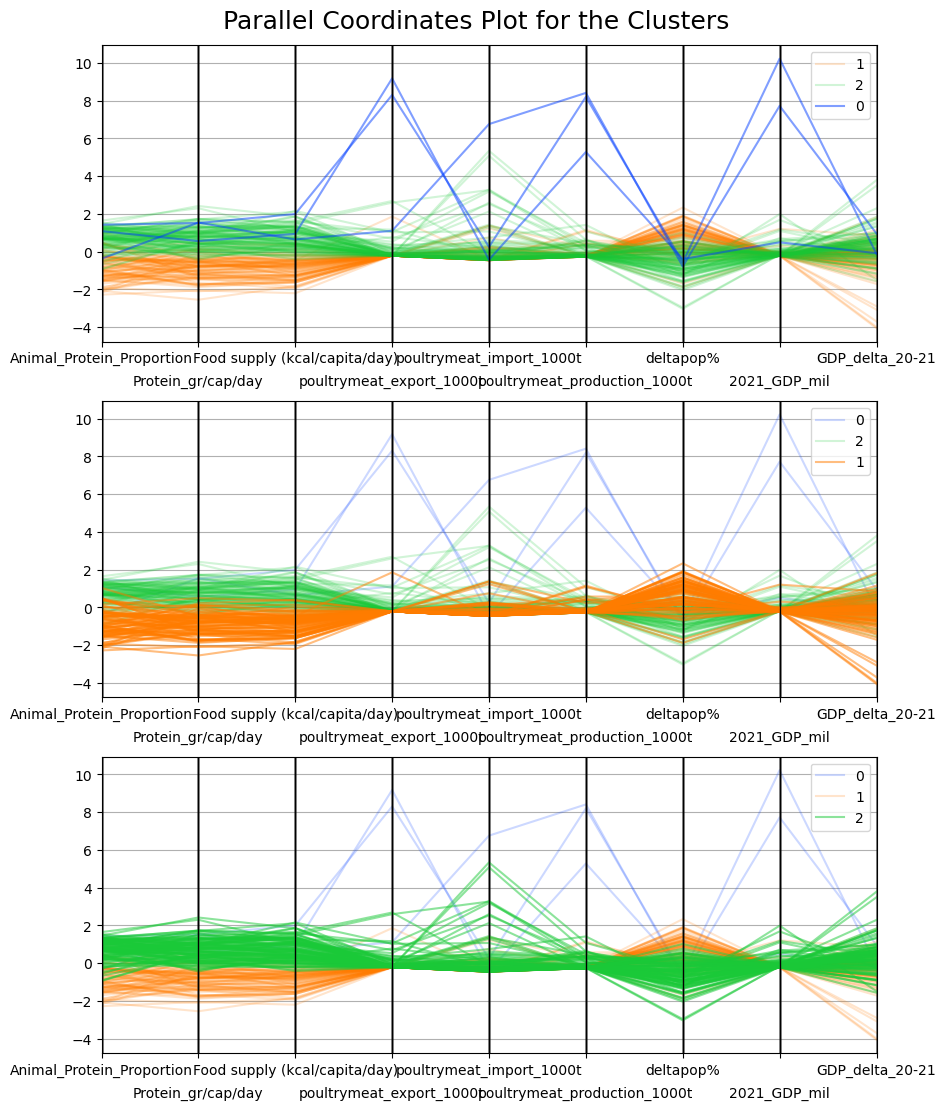

In [102]:
# Add the cluster number to the original scaled data
x_clustered = pd.DataFrame(x_scaled, index=data.index, columns=data.columns)
x_clustered["cluster"] = clusters

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(x_clustered, 3)

#### Blue samples (cluster 0) with high ranking for poultry meat export  and delta pop 
#### Orange samples (cluster 1) with a high proportion poultry meat import and GDP Delta 2021.
#### Green samples (cluster with high ranking in 2021 GDP (mil), poultry meat export and poultry meat production

In [103]:
#### By plotting the centroids (below), we can now more clearly see the variation across the variables for each of the clusters found by the k-means algorithm.

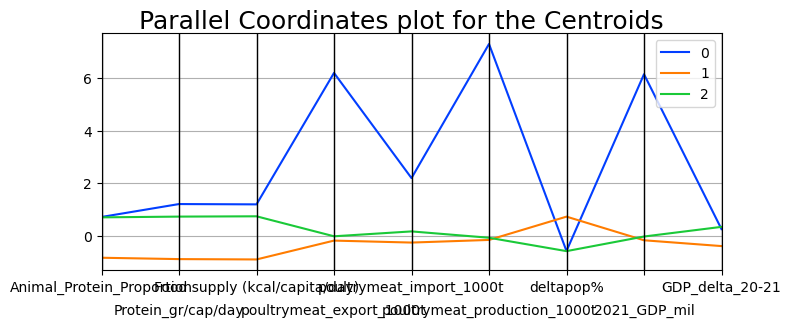

In [104]:
### Plotting the centroids
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)

#### Saving the dataframe containing centroids and its coordinates in a csv file.

In [105]:
centroids.to_csv('Guittar_Dina_4_csv_groupe_centroids_112023.csv')

# Hierachical Clustering

Place each data point into a cluster of its own. 
LOOP
    Compute the distance between every cluster and every other cluster. 
    Merge the two clusters that are closest together into a single cluster.
UNTIL we have only one cluster

In [106]:
# Import standard libraries
import pandas as pd
import numpy as np

# Import the hierarchical clustering algorithm
from sklearn.cluster import AgglomerativeClustering

# Import functions created for this course
from functions import *

### Now we can perform the hierarchical clustering. First, let's ask the algorithm to produce the full hierarchical cluster tree.

In [107]:
# Create a hierarchical clustering model
hiercluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', compute_full_tree=True) 
hiercluster

AgglomerativeClustering(affinity='euclidean', compute_full_tree=True)

### We ask the algorithm to find 3 clusters from the tree:

In [108]:
# Fit the data to the model and determine which clusters each data point belongs to:
hiercluster.set_params(n_clusters=3)
clusters = hiercluster.fit_predict(x_scaled) 
np.bincount(clusters) # count of data points in each cluster

C:\Users\dinad\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([122,  59,   3], dtype=int64)

In [109]:
# Read off 5 clusters:
hiercluster.set_params(n_clusters=5)
clusters = hiercluster.fit_predict(x_scaled) 
np.bincount(clusters) # count of data points in each cluster

C:\Users\dinad\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([ 3, 59, 59, 57,  6], dtype=int64)

#### Let's stick with 5 clusters and put the cluster number on as a new column on the original data, so we can see what it did:

In [110]:
# Add cluster number to the original data
x_scaled_clustered = pd.DataFrame(x_scaled, columns=data.columns, index=data.index)
x_scaled_clustered['cluster'] = clusters

x_scaled_clustered.sort_values(by='cluster', ascending = True)

Animal_Protein_Proportion  Protein_gr/cap/day  \
Country                                                                       
Brazil                                         1.083349            0.554204   
United States of America                       1.423278            1.511153   
China, mainland                               -0.380963            1.536213   
Myanmar                                       -0.979945           -0.426107   
Mozambique                                    -1.516292           -1.883830   
...                                                 ...                 ...   
Germany                                        1.301658            0.925431   
Japan                                          0.694771            0.137530   
Mexico                                         0.664366            0.458636   
France                                         1.218348            1.438522   
Netherlands (Kingdom of the)                   1.266996            1.013778   

                              Food supply (kcal/capita/day)  \
Country                                                       
Brazil                                             0.936369   
United States of America                           1.990659   
China, mainland                                    0.639053   
Myanmar                                           -0.625195   
Mozambique                                        -1.633089   
...                                                     ...   
Germany                                            1.588338   
Japan                                             -0.347823   
Mexico                                             0.649006   
France                                             1.660247   
Netherlands (Kingdom of the)                       1.468910   

                              poultrymeat_export_1000t  \
Country                                                  
Brazil                                        9.181273   
United States of America                      8.303090   
China, mainland                               1.101122   
Myanmar                                      -0.218306   
Mozambique                                   -0.218306   
...                                                ...   
Germany                                       1.043007   
Japan                                        -0.205391   
Mexico                                       -0.214001   
France                                        0.681402   
Netherlands (Kingdom of the)                  2.592743   

                              poultrymeat_import_1000t  \
Country                                                  
Brazil                                       -0.432804   
United States of America                      0.244803   
China, mainland                               6.757628   
Myanmar                                      -0.452303   
Mozambique                                   -0.252433   
...                                                ...   
Germany                                       3.286721   
Japan                                         5.080673   
Mexico                                        5.339041   
France                                        2.521367   
Netherlands (Kingdom of the)                  3.262347   

                              poultrymeat_production_1000t  deltapop%  \
Country                                                                 
Brazil                                            5.279765  -0.397653   
United States of America                          8.201099  -0.578913   
China, mainland                                   8.411616  -0.786076   
Myanmar                                          -0.022563  -0.253387   
Mozambique                                       -0.221040   1.578979   
...                                                    ...        ...   
Germany                                           0.292300  -0.762683   
Japan          

In [111]:
grouped = x_scaled_clustered[['cluster']]
grouped

cluster
Country                                    
Afghanistan                               1
Albania                                   2
Algeria                                   3
Angola                                    1
Antigua and Barbuda                       3
...                                     ...
Venezuela (Bolivarian Republic of)        3
Viet Nam                                  3
Yemen                                     1
Zambia                                    1
Zimbabwe                                  1

[184 rows x 1 columns]

In [112]:
countries = data
grouped_countries = grouped.merge(countries,right_index=True,left_index=True)

In [113]:
grouped_countries.head()

cluster  Animal_Protein_Proportion  Protein_gr/cap/day  \
Country                                                                       
Afghanistan                1                      17.27               60.70   
Albania                    2                      55.52              120.13   
Algeria                    3                      27.96               93.74   
Angola                     1                      29.76               46.78   
Antigua and Barbuda        3                      70.27               89.45   

                     Food supply (kcal/capita/day)  poultrymeat_export_1000t  \
Country                                                                        
Afghanistan                                2374.77                         0   
Albania                                    4520.92                         0   
Algeria                                    3928.05                         0   
Angola                                     2577.21                         0   
Antigua and Barbuda                        3426.09                         0   

                     poultrymeat_import_1000t  poultrymeat_production_1000t  \
Country                                                                       
Afghanistan                                33                            28   
Albania                                    48                            14   
Algeria                                     0                           258   
Angola                                    246                            40   
Antigua and Barbuda                         7                             0   

                     deltapop%   2021_GDP_mil  GDP_delta_20-21  
Country                                                         
Afghanistan           2.892393   14939.009447       -25.836857  
Albania              -0.423461   18260.043500        20.672779  
Algeria               1.671512  163472.801517        12.164696  
Angola                3.216657   70533.243177        28.660805  
Antigua and Barbuda   0.604360    1421.200000         3.710591

### Saving the list of countries and groups to which each belong in a csv.

In [114]:
grouped_countries.to_csv('Guittar_Dina_3_csv_countries_112023.csv')

# Visualize the clusters

In [115]:
# Find the size of the clusters
x_scaled_clustered["cluster"].value_counts()

cluster
1    59
2    59
3    57
4     6
0     3
Name: count, dtype: int64

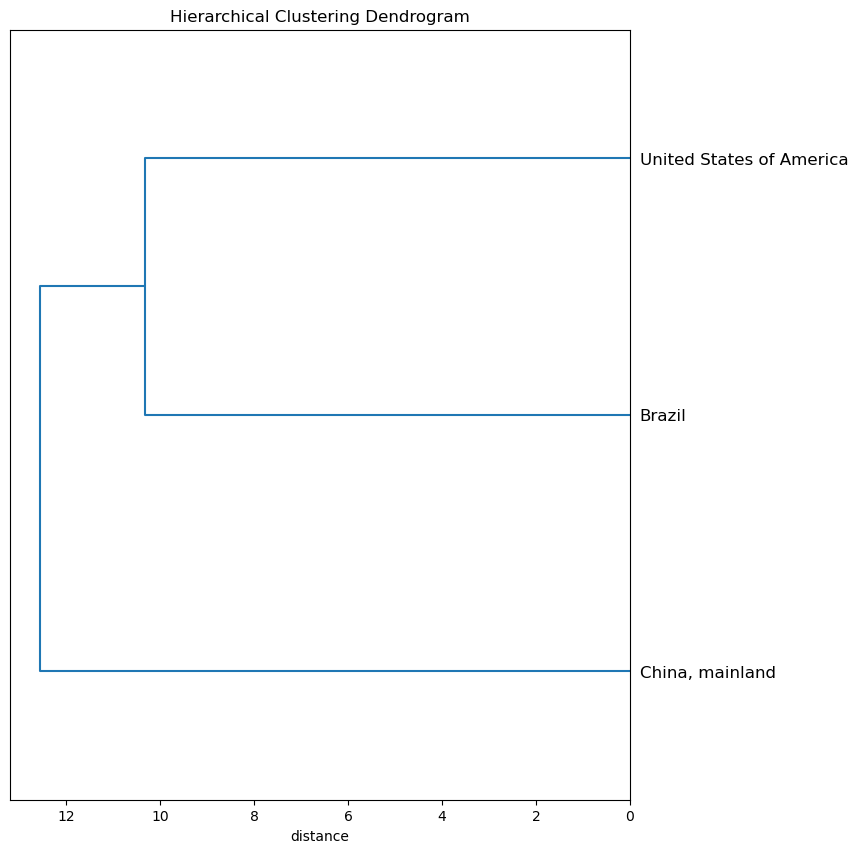

In [125]:
# Show a dendrogram for smallest cluster no.0 = 3 countries.
from scipy.cluster.hierarchy import linkage, fcluster 
sample_0 = x_scaled_clustered[x_scaled_clustered.cluster==0]
Z = linkage(sample_0, 'ward') 
names = sample_0.index 
plot_dendrogram(Z, names, figsize=(8,10))

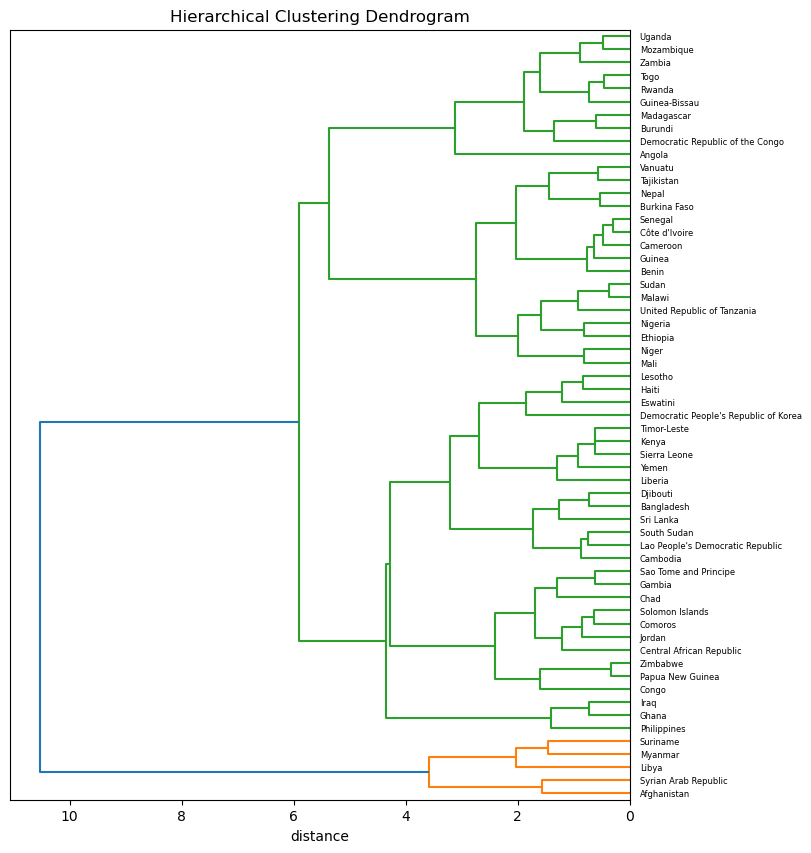

In [127]:
# Show a dendrogram for cluster no.1 = 59 countries.
from scipy.cluster.hierarchy import linkage, fcluster 
sample_1 = x_scaled_clustered[x_scaled_clustered.cluster==1]
Z = linkage(sample_1, 'ward') 
names = sample_1.index 
plot_dendrogram(Z, names, figsize=(8,10))

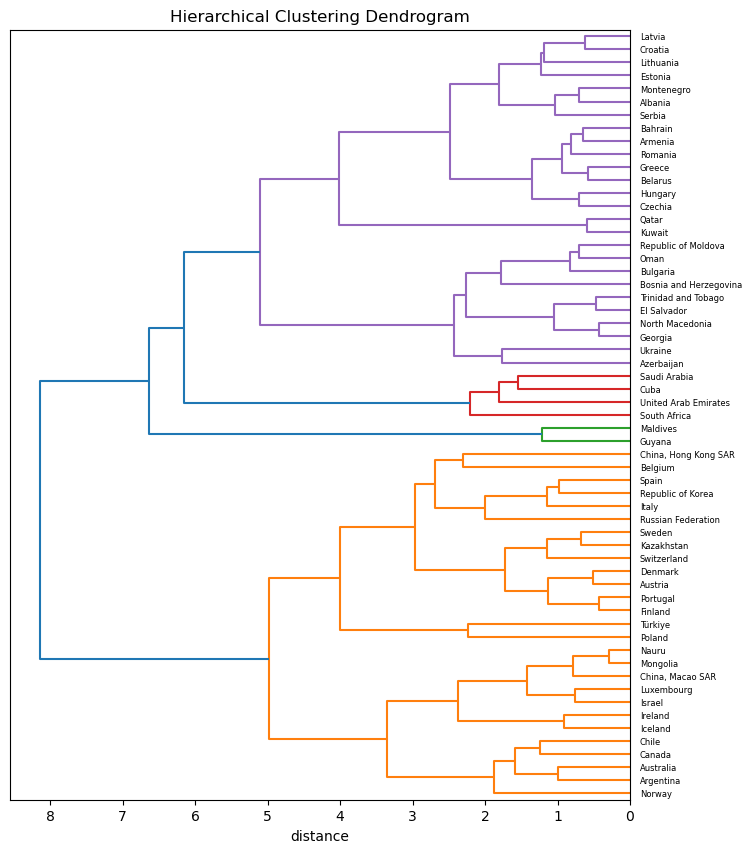

In [128]:
# Show a dendrogram for cluster no.2 = 59 countries.
from scipy.cluster.hierarchy import linkage, fcluster 
sample_2 = x_scaled_clustered[x_scaled_clustered.cluster==2]
Z = linkage(sample_2, 'ward') 
names = sample_2.index 
plot_dendrogram(Z, names, figsize=(8,10))

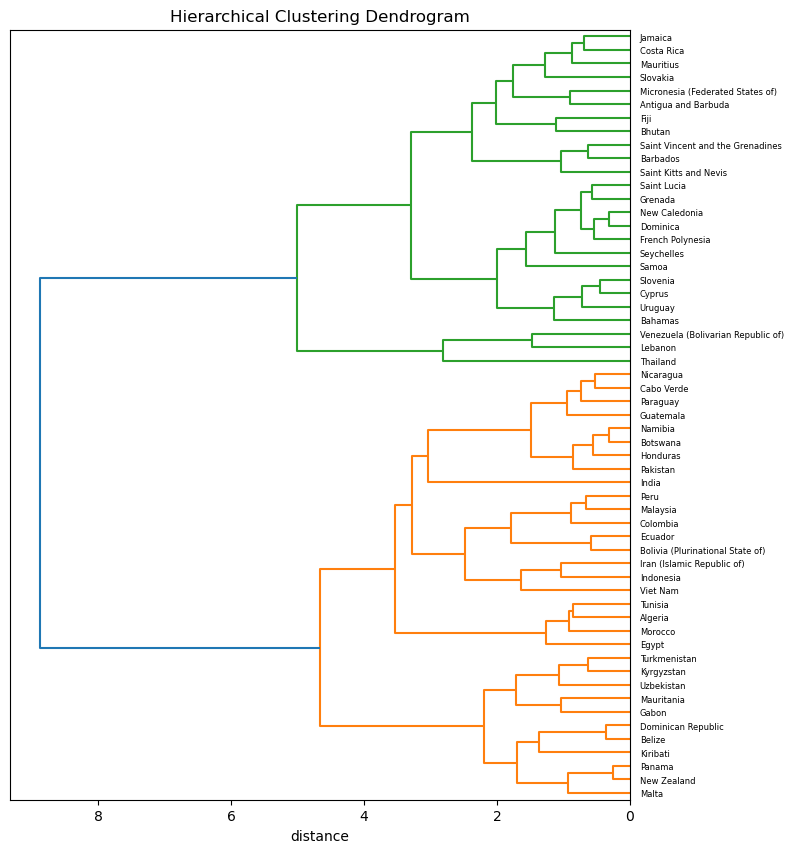

In [130]:
# Show a dendrogram for cluster no.3 = 57 countries.
from scipy.cluster.hierarchy import linkage, fcluster 
sample_3 = x_scaled_clustered[x_scaled_clustered.cluster==3]
Z = linkage(sample_3, 'ward') 
names = sample_3.index 
plot_dendrogram(Z, names, figsize=(8,10))

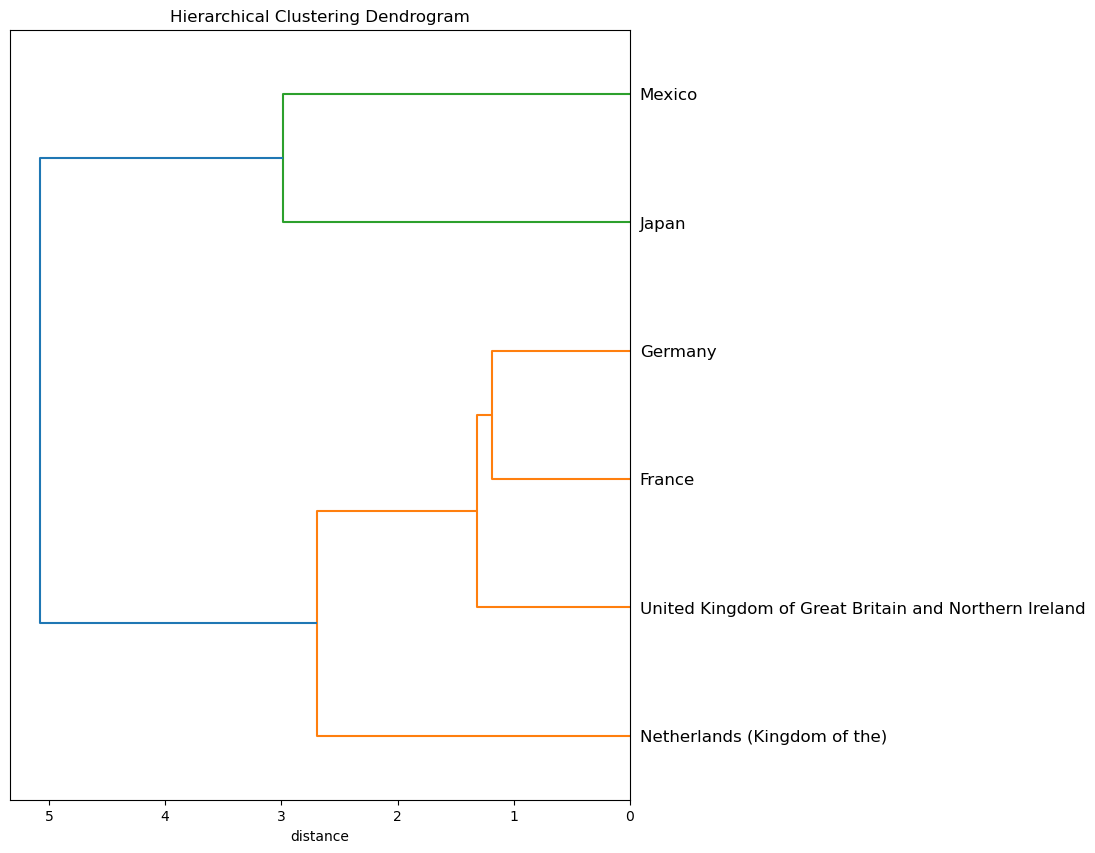

In [131]:
# Show a dendrogram for cluster no.4 = 6 countries.
from scipy.cluster.hierarchy import linkage, fcluster 
sample_4 = x_scaled_clustered[x_scaled_clustered.cluster==4]
Z = linkage(sample_4, 'ward') 
names = sample_4.index 
plot_dendrogram(Z, names, figsize=(8,10))

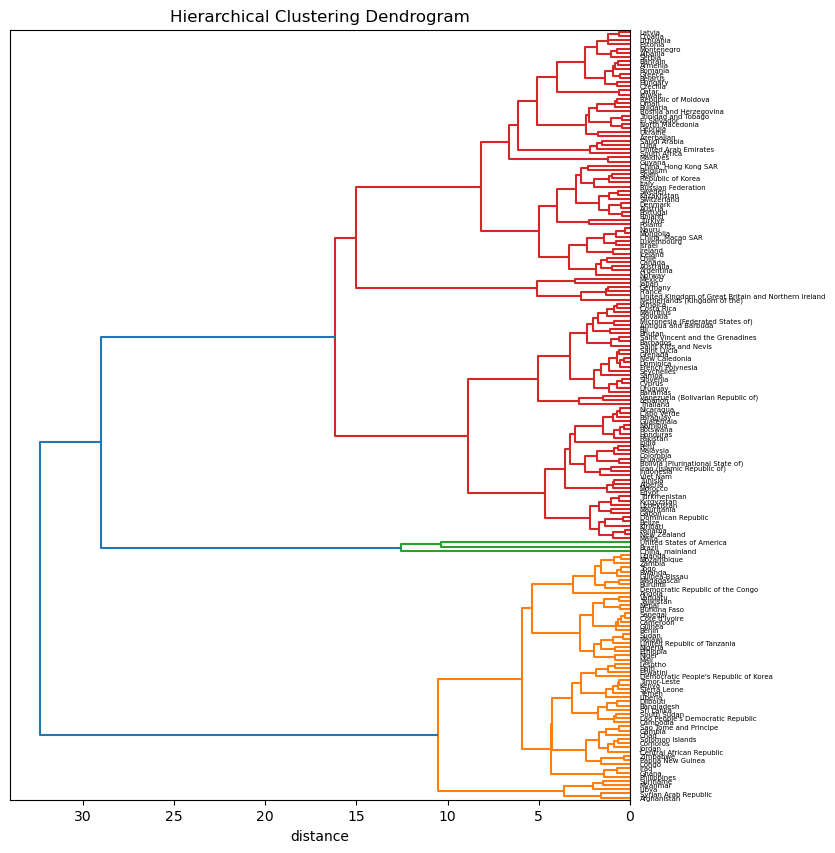

In [332]:
# Dendrogram of ALL studied countries
from scipy.cluster.hierarchy import linkage, fcluster 
sample = x_scaled_clustered
Z = linkage(sample, 'ward') 
names = sample.index 
plot_dendrogram(Z, names, figsize=(8,10))
plt.savefig("dendrogram.png") 
  
plt.show() 

In [117]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(x_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(x_scaled)

### Partitions in the first factorial planes as revealed by PCA

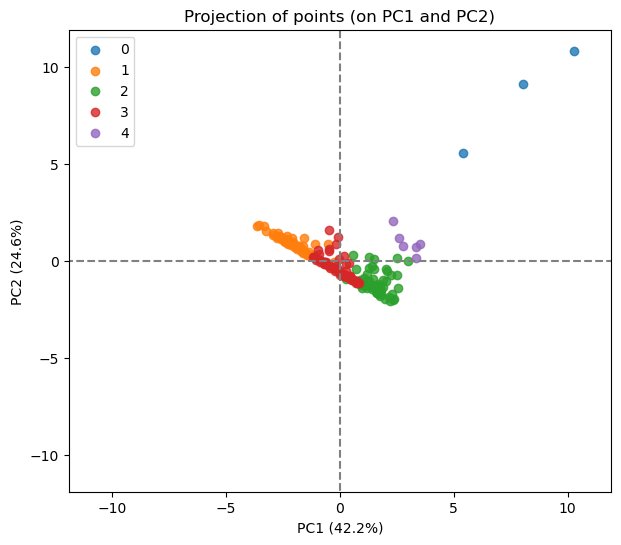

In [29]:
display_factorial_planes(x_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)

#### As with k-means, the clustering algorithm has not given any indication as to what these 5 groups are. Again, we need to examine the clusters and determine a sensible way to interpret them.

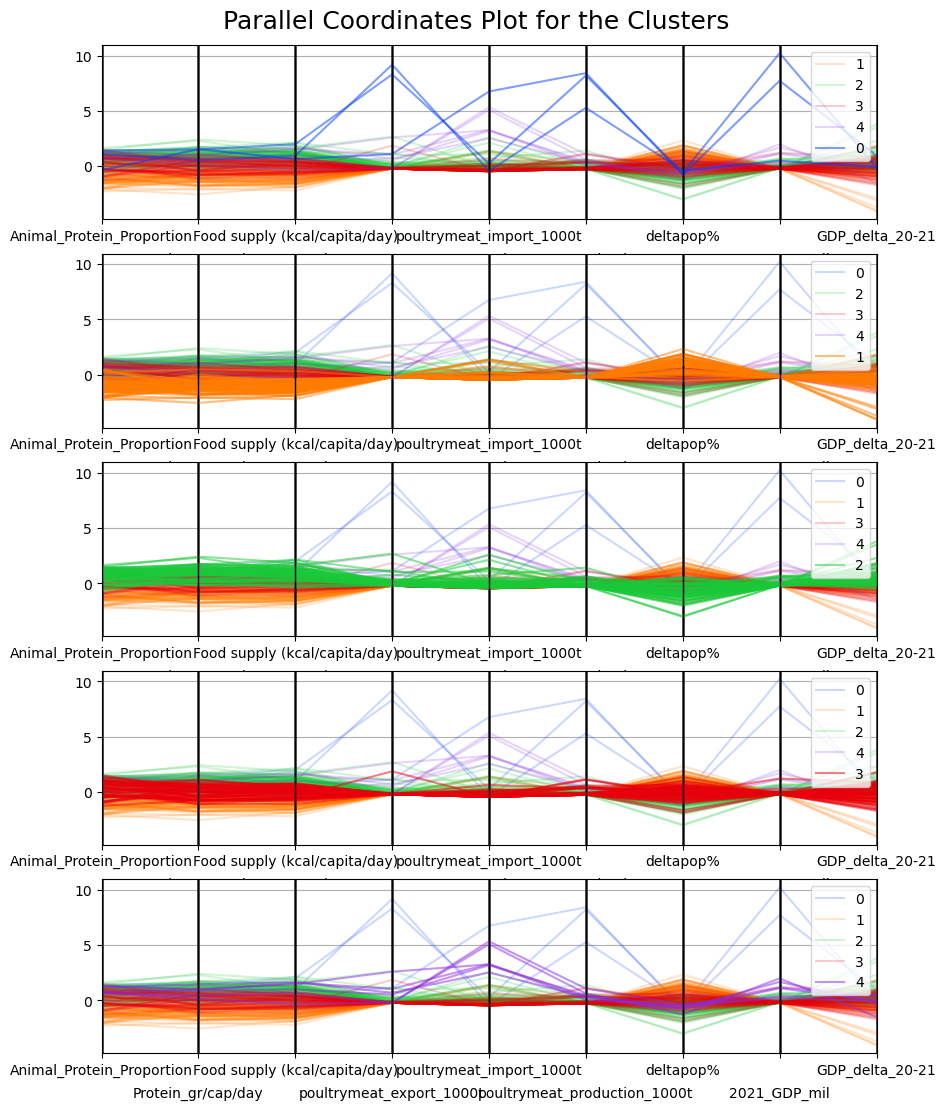

In [30]:
# Add the cluster number to the original scaled data
x_clustered = pd.DataFrame(x_scaled, index=data.index, columns=data.columns)
x_clustered["cluster"] = clusters

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(x_clustered, 5)

#### By characterizing each group in a single data point we can sometimes get a clearer picture.  The k-means algorithm gave us the centroids, which we could use for this purpose.

The hierarchical clustering algorithm doesn't give us back the centroids, but we can compute them ourselves by taking the mean of each variable in each cluster:

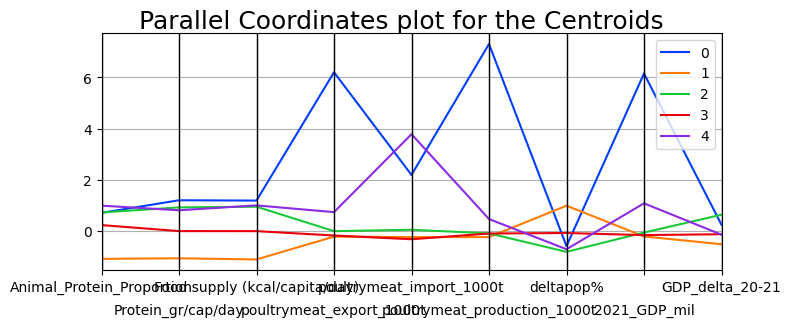

In [31]:
means =  x_clustered.groupby(by="cluster").mean()
display_parallel_coordinates_centroids(means.reset_index(), 5)

#### Cluster 0 is high on poultry meat export, poultry meat production and 2021 GDP in mil.

#### Cluster 1 is high population change percentage for 2020 to 2021.

#### Cluster 2 food supply (kcal/cap/day) is higher than cluster 1 and cluster 3, but slightly lower to cluster 0 and similar to cluster 4. It also shows a slighly higher change in GDP in 2020-21.

#### Cluster 3 across the board shows lower numbers compared to most clusters. It is comprised of mostly island countries.

#### Cluster 4 is high on poultry meat import. It also has a relatively strong GDP in 2021 compared to most clusters (excluding cluster 0)

#### Box Plots
Another way to understand the clusters is to produce boxplots for each variable within each cluster:

array([[<Axes: title={'center': '2021_GDP_mil'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'Animal_Protein_Proportion'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'Food supply (kcal/capita/day)'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'GDP_delta_20-21'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'Protein_gr/cap/day'}, xlabel='[cluster]'>],
       [<Axes: title={'center': 'deltapop%'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'poultrymeat_export_1000t'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'poultrymeat_import_1000t'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'poultrymeat_production_1000t'}, xlabel='[cluster]'>,
        <Axes: >]], dtype=object)

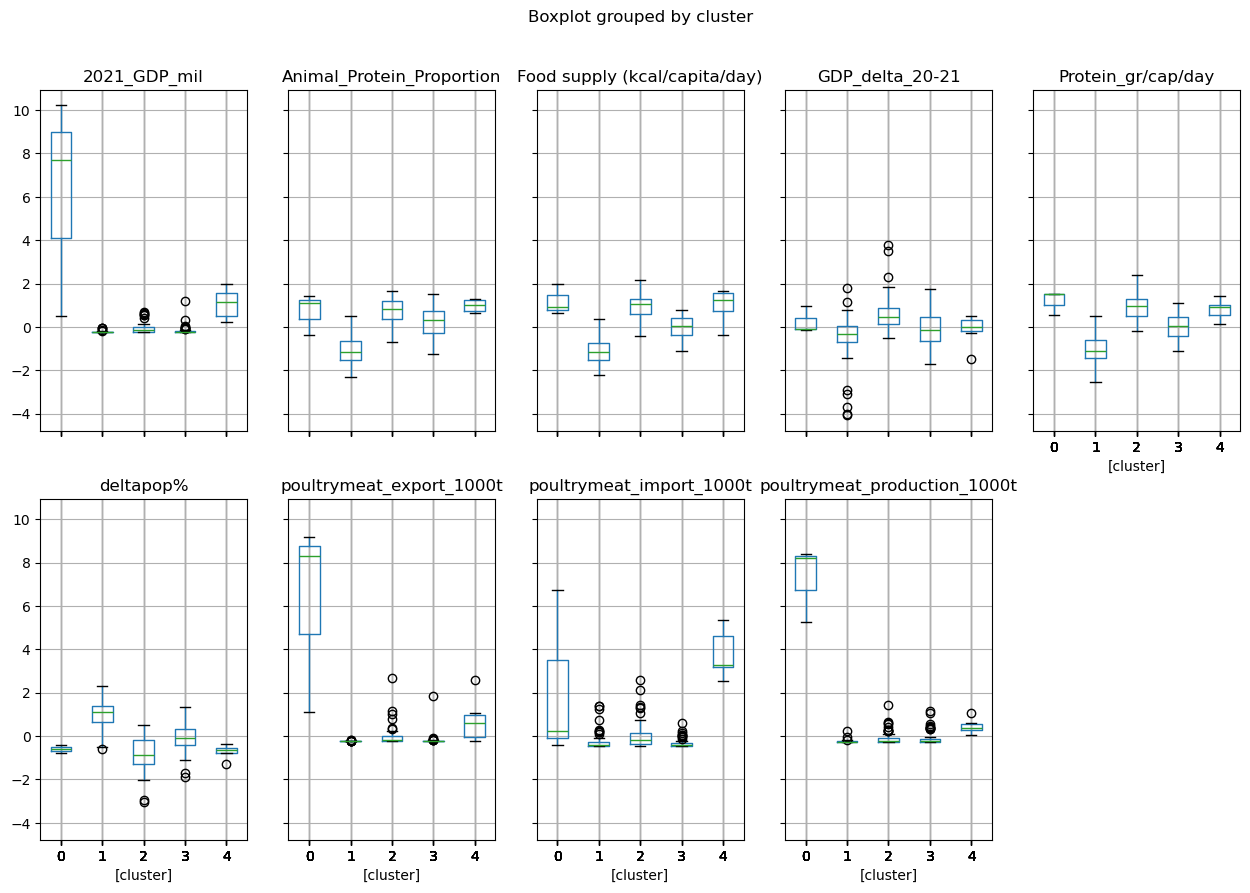

In [32]:
x_clustered.boxplot(by="cluster", figsize=(15,10), layout=(2,5))

##### A short list (5-10) of potential countries with their characteristics.

#### Based on our observations above, we are going to pick cluster 4. We're going to display the 6 countries data in this cluster in a dataframe called 'target'.

In [133]:
target = grouped_countries.loc[grouped_countries['cluster'] == 4]
target

cluster  \
Country                                                       
France                                                    4   
Germany                                                   4   
Japan                                                     4   
Mexico                                                    4   
Netherlands (Kingdom of the)                              4   
United Kingdom of Great Britain and Northern Ir...        4   

                                                    Animal_Protein_Proportion  \
Country                                                                         
France                                                                  65.33   
Germany                                                                 66.70   
Japan                                                                   56.72   
Mexico                                                                  56.22   
Netherlands (Kingdom of the)                                            66.13   
United Kingdom of Great Britain and Northern Ir...                      58.41   

                                                    Protein_gr/cap/day  \
Country                                                                  
France                                                          122.62   
Germany                                                         110.54   
Japan                                                            91.99   
Mexico                                                           99.55   
Netherlands (Kingdom of the)                                    112.62   
United Kingdom of Great Britain and Northern Ir...              109.63   

                                                    Food supply (kcal/capita/day)  \
Country                                                                             
France                                                                    4950.30   
Germany                                                                   4892.07   
Japan                                                                     3324.21   
Mexico                                                                    4131.42   
Netherlands (Kingdom of the)                                              4795.36   
United Kingdom of Great Britain and Northern Ir...                        4403.91   

                                                    poultrymeat_export_1000t  \
Country                                                                        
France                                                                   418   
Germany                                                                  586   
Japan                                                                      6   
Mexico                                                                     2   
Netherlands (Kingdom of the)                                            1306   
United Kingdom of Great Britain and Northern Ir...                       345   

                                                    poultrymeat_import_1000t  \
Country                                                                        
France                                                                   611   
Germany                                                                  768   
Japan                                                                   1136   
Mexico                                                                  1189   
Netherlands (Kingdom of the)                                             763   
United Kingdom of Great Britain and Northern Ir...                       747   

                                                    poultrymeat_production_1000t  \
Country                                                                            
France                                                                      1616   
Germany                                                                     1546   
Japan 

In [134]:
target.to_csv('target_countries.csv')

# Statistical Tests

In [365]:
import pandas as pd
df = target.drop(columns='cluster')
df = df.round(2)

In [366]:
df.corr()

Animal_Protein_Proportion  Protein_gr/cap/day  \
Animal_Protein_Proportion                       1.000000            0.778598   
Protein_gr/cap/day                              0.778598            1.000000   
Food supply (kcal/capita/day)                   0.845032            0.922526   
poultrymeat_export_1000t                        0.782373            0.564718   
poultrymeat_import_1000t                       -0.786272           -0.930089   
poultrymeat_production_1000t                   -0.836312           -0.644233   
deltapop%                                       0.104678            0.363404   
2021_GDP_mil                                   -0.085775           -0.273772   
GDP_delta_20-21                                 0.091045            0.501157   

                               Food supply (kcal/capita/day)  \
Animal_Protein_Proportion                           0.845032   
Protein_gr/cap/day                                  0.922526   
Food supply (kcal/capita/day)                       1.000000   
poultrymeat_export_1000t                            0.658800   
poultrymeat_import_1000t                           -0.831327   
poultrymeat_production_1000t                       -0.602554   
deltapop%                                           0.538950   
2021_GDP_mil                                       -0.371028   
GDP_delta_20-21                                     0.597124   

                               poultrymeat_export_1000t  \
Animal_Protein_Proportion                      0.782373   
Protein_gr/cap/day                             0.564718   
Food supply (kcal/capita/day)                  0.658800   
poultrymeat_export_1000t                       1.000000   
poultrymeat_import_1000t                      -0.609414   
poultrymeat_production_1000t                  -0.841661   
deltapop%                                      0.321580   
2021_GDP_mil                                  -0.432506   
GDP_delta_20-21                                0.168181   

                               poultrymeat_import_1000t  \
Animal_Protein_Proportion                     -0.786272   
Protein_gr/cap/day                            -0.930089   
Food supply (kcal/capita/day)                 -0.831327   
poultrymeat_export_1000t                      -0.609414   
poultrymeat_import_1000t                       1.000000   
poultrymeat_production_1000t                   0.813342   
deltapop%                                     -0.152836   
2021_GDP_mil                                   0.023742   
GDP_delta_20-21                               -0.300903   

                               poultrymeat_production_1000t  deltapop%  \
Animal_Protein_Proportion                         -0.836312   0.104678   
Protein_gr/cap/day                                -0.644233   0.363404   
Food supply (kcal/capita/day)                     -0.602554   0.538950   
poultrymeat_export_1000t                          -0.841661   0.321580   
poultrymeat_import_1000t                           0.813342  -0.152836   
poultrymeat_production_1000t                       1.000000   0.105542   
deltapop%                                          0.105542   1.000000   
2021_GDP_mil                                      -0.053158  -0.853329   
GDP_delta_20-21                                    0.121570   0.941466   

                               2021_GDP_mil  GDP_delta_20-21  
Animal_Protein_Proportion         -0.085775         0.091045  
Protein_gr/cap/day                -0.273772         0.501157  
Food supply (kcal/capita/day)     -0.371028         0.597124  
poultrymeat_export_1000t          -0.432506         0.168181  
poultrymeat_import_1000t           0.023742        -0.300903  
poultrymeat_production_1000t      -0.053158         0.121570  
deltapop%                         -0.853329         0.941466  
2021_GDP_mil                       1.000000        -0.705426  
GDP_delta_20-21                   -0.705426         1.000000

In [367]:
r = df.corr()
type(r)

pandas.core.frame.DataFrame

In [368]:
df.corr()['Animal_Protein_Proportion']['poultrymeat_import_1000t']

-0.7862724360245869

#### Positive correlation: 0.84 As available animal protein proportion increases, the food supply also increases.

#### Negative correlation: -0.78 As available animal protein proportion increases, the poultry meat import decreases.

#### *The corr() function accepts a method parameter that you can use to specify the type of correlation you want to calculate.

Pearson is the default correlation.

In [369]:
import pandas as pd

# Load the target countries dataset 
target = pd.read_csv('target_countries.csv')
target = target.set_index('Country')
# Apply the corr() function to the dataframe 
# and select the weight and height correlation
r = target.corr()['poultrymeat_import_1000t']['2021_GDP_mil']
print("Correlation between poultry meat import and 2021 GDP in mil is {:.2f}".format( r ))

Correlation between poultry meat import and 2021 GDP in mil is 0.02


In [370]:
r = target.corr()['poultrymeat_import_1000t']['poultrymeat_export_1000t']
print("Correlation between poultry meat import and poultry meat export is {:.2f}".format( r ))

Correlation between poultry meat import and poultry meat export is -0.61


# Adequacy Test

## Kaiser-Meyer-Olkin (KMO) Test 
### measures the suitability of data for factor analysis.KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [377]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(x_scaled_clustered)
kmo_model

0.7287092966274408

In [378]:
### The overall KMO for our data is 0.72, which is good. 

## Build a linear regression model

In [152]:
# import the modules
import statsmodels.api as sm
import pandas as pd

# single out the input variables X 
X = x_scaled_clustered['Animal_Protein_Proportion']
# Add a constant 
X = sm.add_constant(X)
# define the target variable y
y = x_scaled_clustered['poultrymeat_import_1000t']

# Define the model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     poultrymeat_import_1000t   R-squared:                       0.026
Model:                                  OLS   Adj. R-squared:                  0.020
Method:                       Least Squares   F-statistic:                     4.797
Date:                      Wed, 26 Jun 2024   Prob (F-statistic):             0.0298
Time:                              15:55:12   Log-Likelihood:                -258.69
No. Observations:                       184   AIC:                             521.4
Df Residuals:                           182   BIC:                             527.8
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [153]:
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [154]:
results.pvalues

const                        1.000000
Animal_Protein_Proportion    0.029787
dtype: float64

In [157]:
r = x_scaled_clustered.corr()['poultrymeat_import_1000t']['2021_GDP_mil']
print("Correlation between poultrymeat_import_1000t and 2021_GDP_mil is {:.2f}".format( r ))

Correlation between poultrymeat_import_1000t and 2021_GDP_mil is 0.48


In [156]:
#### The result is a string positive correlation  r = 0.48.

In [158]:
r = x_scaled_clustered.corr()['poultrymeat_import_1000t']['poultrymeat_export_1000t']
print("Correlation between poultrymeat_import_1000t and poultrymeat_export_1000t is {:.2f}".format( r ))

Correlation between poultrymeat_import_1000t and poultrymeat_export_1000t is 0.14


In [160]:
print(x_scaled_clustered.corr()['poultrymeat_export_1000t'])

Animal_Protein_Proportion        0.206768
Protein_gr/cap/day               0.198223
Food supply (kcal/capita/day)    0.271510
poultrymeat_export_1000t         1.000000
poultrymeat_import_1000t         0.143658
poultrymeat_production_1000t     0.739874
deltapop%                       -0.137193
2021_GDP_mil                     0.584406
GDP_delta_20-21                  0.011138
cluster                         -0.152104
Name: poultrymeat_export_1000t, dtype: float64


## 4 ways to test for normal distribution. Chosen Variable: Animal Protein Proportion

(array([0.08299588, 0.13832646, 0.05533058, 0.22132234, 0.16599175,
        0.24898763, 0.3319835 , 0.11066117, 0.24898763, 0.24898763,
        0.38731409, 0.16599175, 0.24898763, 0.3596488 , 0.3319835 ,
        0.52564055, 0.3596488 , 0.47030996, 0.27665292, 0.11066117]),
 array([-2.28675825, -2.09031057, -1.89386288, -1.69741519, -1.50096751,
        -1.30451982, -1.10807213, -0.91162445, -0.71517676, -0.51872908,
        -0.32228139, -0.1258337 ,  0.07061398,  0.26706167,  0.46350935,
         0.65995704,  0.85640473,  1.05285241,  1.2493001 ,  1.44574779,
         1.64219547]),
 <BarContainer object of 20 artists>)

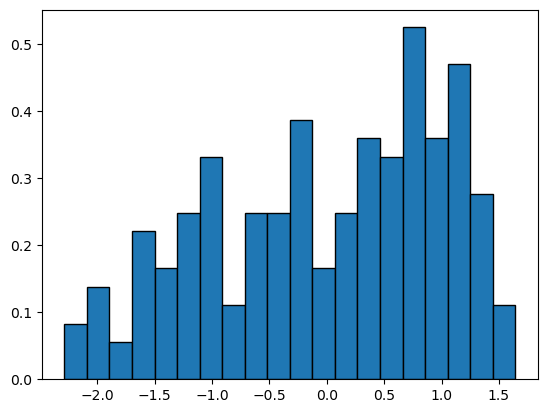

In [225]:
#Method 1: create histogram to visualize values in dataset
dataset = x_scaled_clustered['Animal_Protein_Proportion']
plt.hist(dataset, density=True, edgecolor='black',bins=20)

In [222]:
dataset

Country
Afghanistan                          -1.704196
Albania                               0.621799
Algeria                              -1.054133
Angola                               -0.944675
Antigua and Barbuda                   1.518751
                                        ...   
Venezuela (Bolivarian Republic of)    0.118289
Viet Nam                             -0.256302
Yemen                                -1.438455
Zambia                               -1.000620
Zimbabwe                              0.470381
Name: Animal_Protein_Proportion, Length: 184, dtype: float64

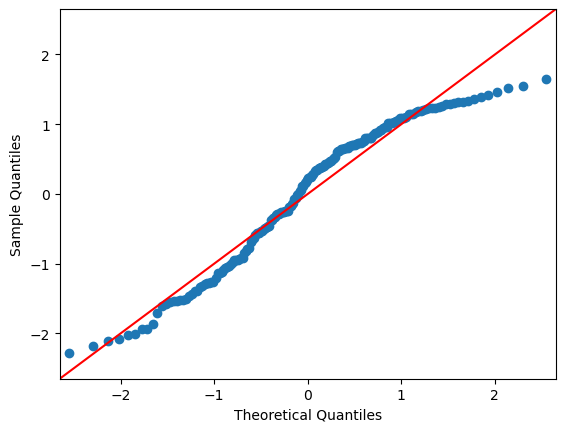

In [162]:
#Method 2: create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(dataset, line='45')

plt.show()

In [164]:
#Method 3: perform Shapiro-Wilk test for normality
from scipy.stats import shapiro 
shapiro(dataset)

ShapiroResult(statistic=0.9494841694831848, pvalue=4.069810529472306e-06)

In [165]:
# Method 4: #perform Kolmogorov-Smirnov test for normality
from scipy.stats import kstest
kstest(dataset, 'norm')

KstestResult(statistic=0.10898040985099389, pvalue=0.023361826112617723, statistic_location=0.6084203084775344, statistic_sign=-1)

#### From the output we can see that the test statistic is 0.108 and the corresponding p-value is 0.023.

Since the p-value is less than .05, we reject the null hypothesis of the Kolmogorov-Smirnov test.

This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

### Let's check if the population change(deltapop%) is normally distributed or not.

(array([ 2.,  0.,  0.,  2.,  4.,  5., 10., 13., 14., 19., 17., 20., 17.,
        13., 13., 14., 11.,  4.,  5.,  1.]),
 array([-3.038682  , -2.77024208, -2.50180216, -2.23336224, -1.96492233,
        -1.69648241, -1.42804249, -1.15960257, -0.89116266, -0.62272274,
        -0.35428282, -0.0858429 ,  0.18259701,  0.45103693,  0.71947685,
         0.98791677,  1.25635668,  1.5247966 ,  1.79323652,  2.06167644,
         2.33011635]),
 <BarContainer object of 20 artists>)

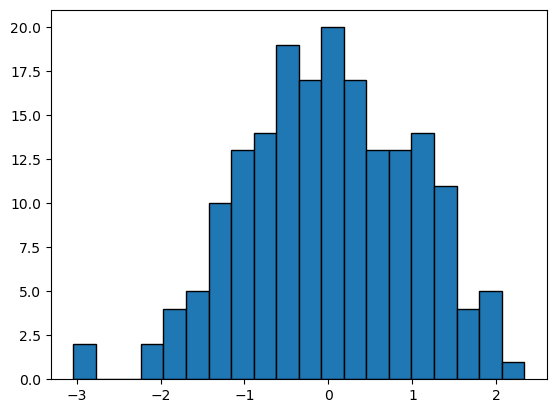

In [167]:
#Method 1: create histogram to visualize values in dataset
data = x_scaled_clustered['deltapop%']
plt.hist(data, edgecolor='black', bins=20)

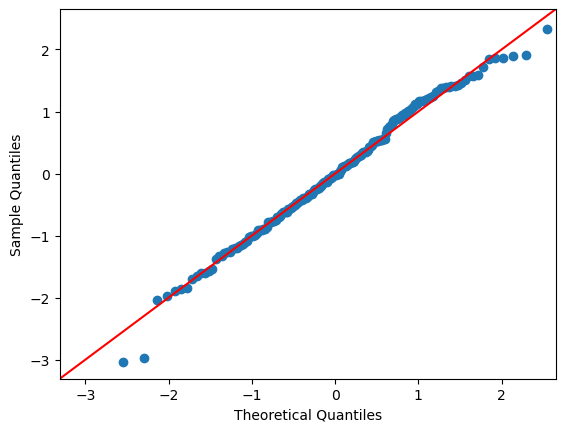

In [168]:
#Method 2: create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(data, line='45')

plt.show()

In [169]:
#Method 3: perform Shapiro-Wilk test for normality
from scipy.stats import shapiro 
shapiro(data)

ShapiroResult(statistic=0.9908638596534729, pvalue=0.29337558150291443)

In [170]:
# Method 4: #perform Kolmogorov-Smirnov test for normality
from scipy.stats import kstest
kstest(data, 'norm')

KstestResult(statistic=0.04547103143723408, pvalue=0.8243719894458821, statistic_location=0.8448611426569418, statistic_sign=-1)

#### From the output we can see that the test statistic is 0.045 and the corresponding p-value is 0.824.
#### Since the p-value is more than .05, we accept the null hypothesis of the Kolmogorov-Smirnov test.

#### This means we have sufficient evidence to say that the sample data does come from a normal distribution.

### Let's check if the protein availability is normally distributed or not.

In [173]:
ds = x_scaled_clustered['Protein_gr/cap/day']

(array([ 3.,  8., 21., 24., 26., 34., 30., 25., 11.,  2.]),
 array([-2.55535107, -2.0582725 , -1.56119392, -1.06411535, -0.56703677,
        -0.0699582 ,  0.42712037,  0.92419895,  1.42127752,  1.91835609,
         2.41543467]),
 <BarContainer object of 10 artists>)

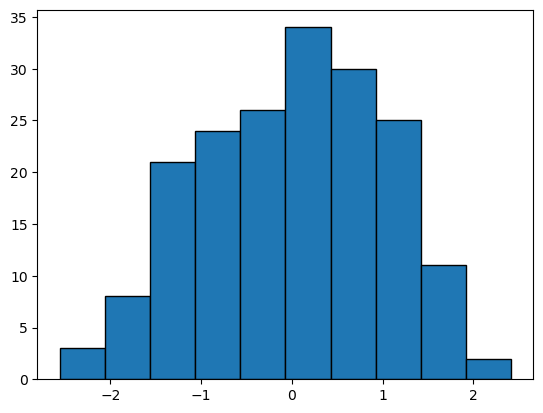

In [379]:
#Method 1: create histogram to visualize values in dataset
plt.hist(ds, edgecolor='black', bins=10)

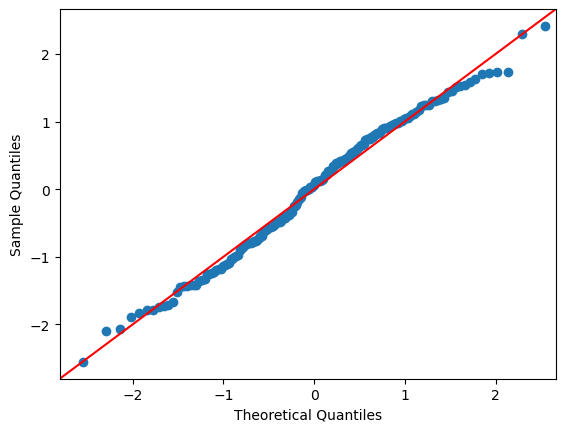

In [175]:
#Method 2: create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(ds, line='45')

plt.show()

In [176]:
#Method 3: perform Shapiro-Wilk test for normality
from scipy.stats import shapiro 
shapiro(ds)

ShapiroResult(statistic=0.9864866733551025, pvalue=0.0748802125453949)

In [177]:
# Method 4: #perform Kolmogorov-Smirnov test for normality
from scipy.stats import kstest
kstest(ds, 'norm')

KstestResult(statistic=0.058648343236710976, pvalue=0.5319862125106025, statistic_location=0.3881288205078723, statistic_sign=-1)

## From the above tests, we found that the population change percentage (deltapop%) and protein availability (Protein_gr/cap/day) are normally distributed but not the Animal Protein Proportion.

## Next, we are going to do a comparison test of two clusters (in the Gaussian case). Gaussian case = Normal distribution.

### We will select protein availability as our Gaussian case.

C:\Users\dinad\AppData\Local\Temp\ipykernel_20596\1818985390.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds, hist=False)
C:\Users\dinad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


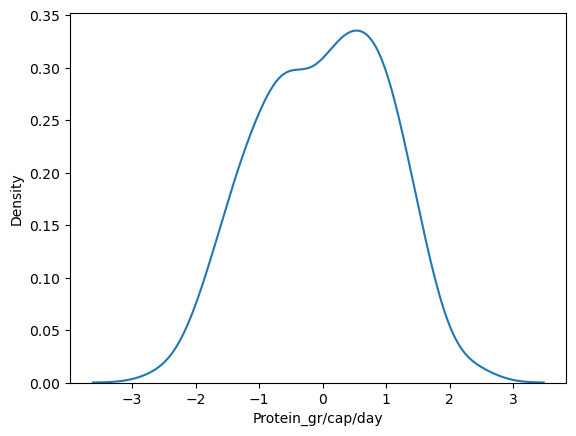

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(ds, hist=False)

plt.show()

In [208]:
### We are going to perform comparison test on Cluster 2 & 4 for protein availability.
### define cluster 2
c0 = sample_0['Protein_gr/cap/day']
c2 = sample_2['Protein_gr/cap/day']
c4 = sample_4['Protein_gr/cap/day']

In [192]:
# Running a Two-Tailed Two-Sample T-Test in Python
from scipy.stats import ttest_ind

In [203]:
# Perform two-sample t-test
t_statistic, p_value = ttest_ind(c2, c4)

In [204]:
# Output the results
print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")

t-statistic: 0.4591922136834976
P-value: 0.6476766452095059


In [207]:
# Check if the result is statistically significant (using a common significance level of 0.05)
if p_value < 0.05:
    print("There is a significant difference between the protein availability for the two clusters.")
else:
    print("There is no significant difference between the protein availability for the two clusters.")

There is no significant difference between the protein availability for the two clusters.


In [209]:
### compare cluster 0 vs cluster 4.
# Perform two-sample t-test
t_statistic, p_value = ttest_ind(c0, c4)

In [210]:
# Output the results
print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")

t-statistic: 1.1343473055294175
P-value: 0.2939958884074072


In [213]:
# Check if the result is statistically significant (using a common significance level of 0.05)
if p_value < 0.05:
    print("There is a significant difference between the protein availability for the two clusters.")
else:
    print("There is no significant difference between the protein availability for the two clusters.")

There is no significant difference between the protein availability for the two clusters.


C:\Users\dinad\AppData\Local\Temp\ipykernel_20596\2386827228.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2, label ='Cluster 2')
C:\Users\dinad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dinad\AppData\Local\Temp\ipykernel_20596\2386827228.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar f

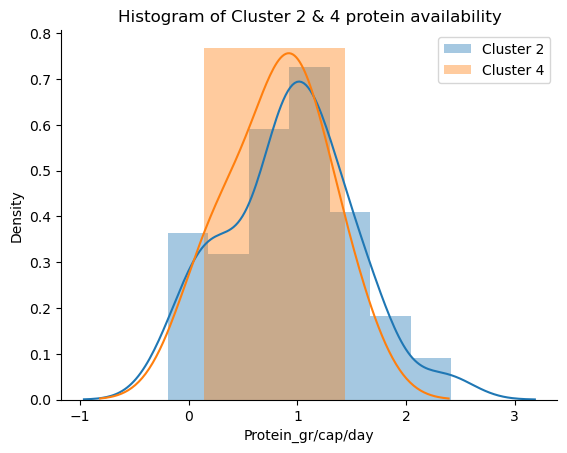

In [217]:
sns.distplot(c2, label ='Cluster 2')
sns.distplot(c4, label = 'Cluster 4')
plt.legend()
plt.title('Histogram of Cluster 2 & 4 protein availability')
plt.xlabel('Protein_gr/cap/day')
sns.despine()

C:\Users\dinad\AppData\Local\Temp\ipykernel_20596\1569980084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2, label ='Cluster 0')
C:\Users\dinad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dinad\AppData\Local\Temp\ipykernel_20596\1569980084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar f

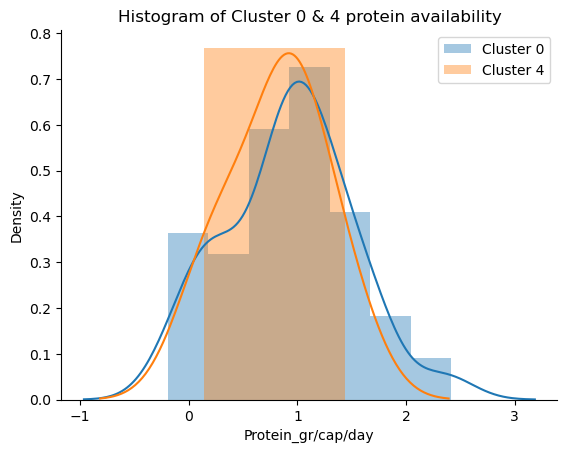

In [218]:
sns.distplot(c2, label ='Cluster 0')
sns.distplot(c4, label = 'Cluster 4')
plt.legend()
plt.title('Histogram of Cluster 0 & 4 protein availability')
plt.xlabel('Protein_gr/cap/day')
sns.despine()

In [237]:
fs = x_scaled_clustered['Food supply (kcal/capita/day)']
fs

Country
Afghanistan                          -1.520293
Albania                               1.130003
Algeria                               0.397863
Angola                               -1.270298
Antigua and Barbuda                  -0.222011
                                        ...   
Venezuela (Bolivarian Republic of)   -1.097905
Viet Nam                             -0.003321
Yemen                                -1.536680
Zambia                               -1.508635
Zimbabwe                             -1.385812
Name: Food supply (kcal/capita/day), Length: 184, dtype: float64

(array([ 1.,  4.,  5.,  9., 11.,  8., 13., 16., 10., 10., 12., 17., 12.,
        13., 11., 12.,  9.,  5.,  3.,  3.]),
 array([-2.20969198, -1.99156297, -1.77343396, -1.55530494, -1.33717593,
        -1.11904692, -0.9009179 , -0.68278889, -0.46465988, -0.24653086,
        -0.02840185,  0.18972716,  0.40785617,  0.62598519,  0.8441142 ,
         1.06224321,  1.28037223,  1.49850124,  1.71663025,  1.93475927,
         2.15288828]),
 <BarContainer object of 20 artists>)

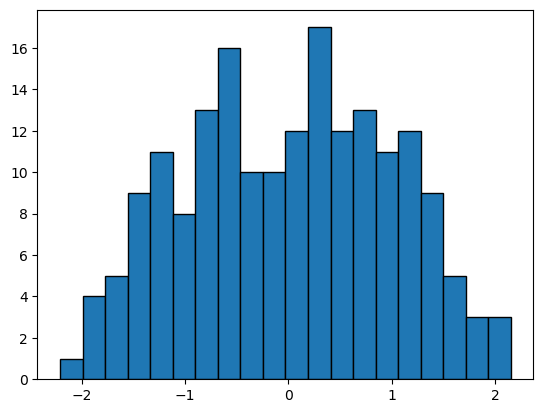

In [353]:
plt.hist(fs, edgecolor='black', bins=20)

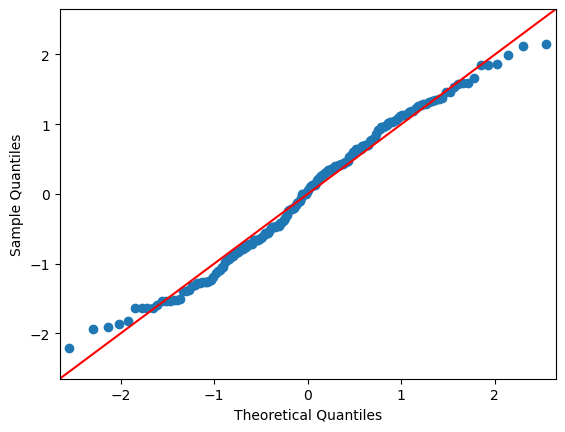

In [336]:
fig = sm.qqplot(fs, line='45')

plt.show()

In [339]:
#Method 3: 
from scipy.stats import shapiro 
shapiro(fs)

ShapiroResult(statistic=0.9814320206642151, pvalue=0.015063632279634476)

In [338]:
# Method 4: #perform Kolmogorov-Smirnov test for normality
from scipy.stats import kstest
kstest(fs, 'norm')

KstestResult(statistic=0.056248929144471216, pvalue=0.5854343398845966, statistic_location=-0.4560254088098201, statistic_sign=1)

C:\Users\dinad\AppData\Local\Temp\ipykernel_20596\3392494427.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fs, hist=False)
C:\Users\dinad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


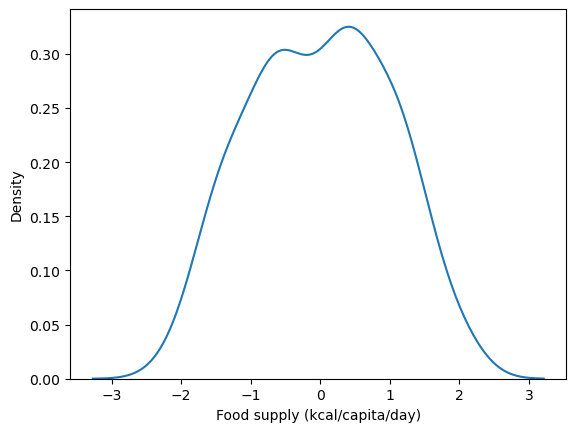

In [341]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(fs, hist=False)

plt.show()

### Food Supply in kcal variable is normally distributed. Therfore, we can now perform comparison between 2 clusters for this variable.

In [240]:
### We are going to perform comparison test on Cluster 2 & 4 for Food supply (kcal/capita/day)
### define the clusters for this variable.
f0 = sample_0['Food supply (kcal/capita/day)']
f2 = sample_2['Food supply (kcal/capita/day)']
f4 = sample_4['Food supply (kcal/capita/day)']

In [241]:
from scipy import stats
result = stats.ttest_ind(f0,f4)
print(result)

TtestResult(statistic=0.35388730678183444, pvalue=0.7338427899596778, df=7.0)


In [245]:
# Check if the result is statistically significant (using a common significance level of 0.05)
if p_value < 0.05:
    print("There is a significant difference between the Food supply (kcal/capita/day) for the two clusters.")
else:
    print("There is no significant difference between the Food supply (kcal/capita/day) for the two clusters.")

There is no significant difference between the Food supply (kcal/capita/day) for the two clusters.


In [246]:
from scipy import stats
result = stats.ttest_ind(f2,f4)
print(result)

TtestResult(statistic=-0.20475976840713797, pvalue=0.8384199237839701, df=63.0)


In [247]:
# Check if the result is statistically significant (using a common significance level of 0.05)
if p_value < 0.05:
    print("There is a significant difference between the Food supply (kcal/capita/day) for the two clusters.")
else:
    print("There is no significant difference between the Food supply (kcal/capita/day) for the two clusters.")

There is no significant difference between the Food supply (kcal/capita/day) for the two clusters.


C:\Users\dinad\AppData\Local\Temp\ipykernel_20596\1384953380.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(f0, label ='Cluster 0')
C:\Users\dinad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dinad\AppData\Local\Temp\ipykernel_20596\1384953380.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar f

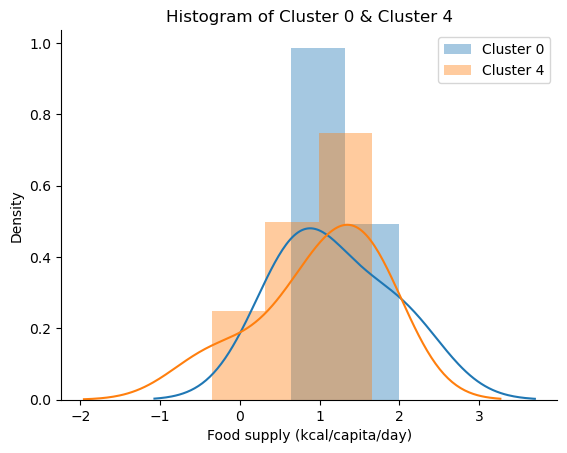

In [252]:
sns.distplot(f0, label ='Cluster 0')
sns.distplot(f4, label = 'Cluster 4')
plt.legend()
plt.title('Histogram of Cluster 0 & Cluster 4')
plt.xlabel('Food supply (kcal/capita/day)')
sns.despine()

C:\Users\dinad\AppData\Local\Temp\ipykernel_20596\3459070362.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(f2, label ='Cluster 2')
C:\Users\dinad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dinad\AppData\Local\Temp\ipykernel_20596\3459070362.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar f

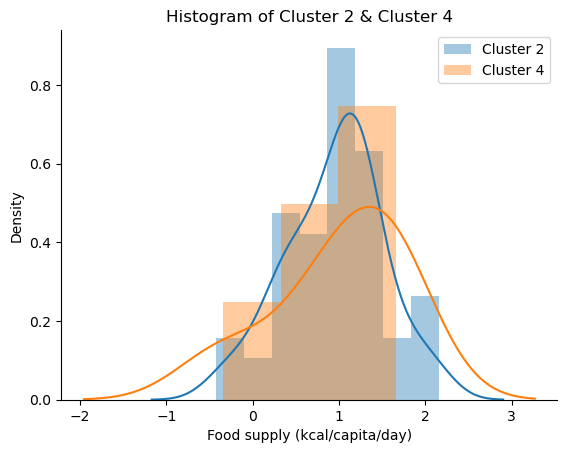

In [253]:
sns.distplot(f2, label ='Cluster 2')
sns.distplot(f4, label = 'Cluster 4')
plt.legend()
plt.title('Histogram of Cluster 2 & Cluster 4')
plt.xlabel('Food supply (kcal/capita/day)')
sns.despine()

In [271]:
# Import pandas
import pandas as pd
# reading csv file
ps = pd.read_csv("politicalstability.csv")

In [272]:
ps = ps.rename(columns={'Area': 'Country', 'Value':'political_stability_index'})

In [273]:
ps = ps.drop(columns=['Domain Code', 'Area Code (M49)','Element Code','Element','Item','Unit','Flag','Flag Description','Note'])

In [274]:
ps = ps.drop(columns=['Domain','Item Code','Year Code'])

In [295]:
ps = ps.set_index('Country').drop(columns='Year')

In [343]:
df_join = x_scaled_clustered.join(ps)
df_join

Animal_Protein_Proportion  \
Country                                                         
Afghanistan                                         -1.704196   
Albania                                              0.621799   
Algeria                                             -1.054133   
Angola                                              -0.944675   
Antigua and Barbuda                                  1.518751   
...                                                       ...   
Venezuela (Bolivarian Republic of)                   0.118289   
Viet Nam                                            -0.256302   
Yemen                                               -1.438455   
Zambia                                              -1.000620   
Zimbabwe                                             0.470381   

                                    Protein_gr/cap/day  \
Country                                                  
Afghanistan                                  -1.191496   
Albania                                       1.332761   
Algeria                                       0.211860   
Angola                                       -1.782741   
Antigua and Barbuda                           0.029644   
...                                                ...   
Venezuela (Bolivarian Republic of)           -1.112069   
Viet Nam                                      0.346079   
Yemen                                        -1.174506   
Zambia                                       -1.784440   
Zimbabwe                                     -1.322742   

                                    Food supply (kcal/capita/day)  \
Country                                                             
Afghanistan                                             -1.520293   
Albania                                                  1.130003   
Algeria                                                  0.397863   
Angola                                                  -1.270298   
Antigua and Barbuda                                     -0.222011   
...                                                           ...   
Venezuela (Bolivarian Republic of)                      -1.097905   
Viet Nam                                                -0.003321   
Yemen                                                   -1.536680   
Zambia                                                  -1.508635   
Zimbabwe                                                -1.385812   

                                    poultrymeat_export_1000t  \
Country                                                        
Afghanistan                                        -0.218306   
Albania                                            -0.218306   
Algeria                                            -0.218306   
Angola                                             -0.218306   
Antigua and Barbuda                                -0.218306   
...                                                      ...   
Venezuela (Bolivarian Republic of)                 -0.218306   
Viet Nam                                           -0.194629   
Yemen                                              -0.218306   
Zambia                                             -0.198934   
Zimbabwe                                           -0.218306   

                                    poultrymeat_import_1000t  \
Country                                                        
Afghanistan                                        -0.296307   
Albania                                            -0.223184   
Algeria                                            -0.457178   
Angola                                              0.742040   
Antigua and Barbuda                                -0.423054   
...                                                      ...   
Venezuela (Bolivarian Republic of)                 -0.374305   
Viet Nam                                            0.620168   
Yemen                                               0.264303   


In [347]:
psv = df_join['political_stability_index']
psv

Country
Afghanistan                          -2.53
Albania                               0.11
Algeria                              -0.88
Angola                               -0.71
Antigua and Barbuda                   0.96
                                      ... 
Venezuela (Bolivarian Republic of)   -1.53
Viet Nam                             -0.11
Yemen                                -2.59
Zambia                                0.06
Zimbabwe                             -1.03
Name: political_stability_index, Length: 184, dtype: float64

(array([ 7.,  4.,  8., 10., 21., 33., 25., 22., 35., 16.]),
 array([-2.66, -2.25, -1.84, -1.43, -1.02, -0.61, -0.2 ,  0.21,  0.62,
         1.03,  1.44]),
 <BarContainer object of 10 artists>)

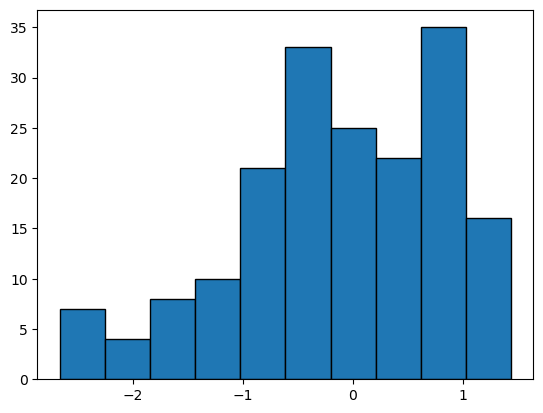

In [380]:
#Method 1: create histogram to visualize values in dataset
plt.hist(psv, edgecolor='black', bins=10)

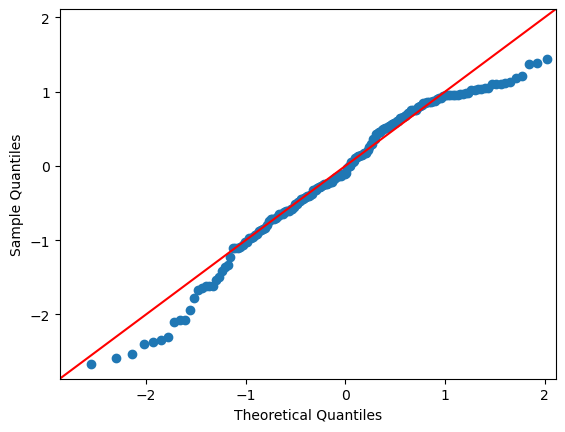

In [351]:
fig = sm.qqplot(psv, line='45')

plt.show()

In [352]:
#Method 3: perform Shapiro-Wilk test for normality
from scipy.stats import shapiro 
shapiro(psv)

ShapiroResult(statistic=nan, pvalue=1.0)

In [349]:
# Method 4: #perform Kolmogorov-Smirnov test for normality
from scipy.stats import kstest
kstest(psv,'norm')

KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=-1)

In [312]:
sample_p0 = df_join[df_join.cluster==0]
sample_p2 = df_join[df_join.cluster==2]
sample_p4 = df_join[df_join.cluster==4]

In [316]:
### We are going to perform comparison test on Cluster 2 & 4 for political stability index 
### political stability index range: Weak -2.5 to Strong 2.5.
### define the clusters for this variable.
p2= sample_p2 ['political_stability_index']
p4 =sample_p4['political_stability_index']

C:\Users\dinad\AppData\Local\Temp\ipykernel_20596\3109984287.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p2, label ='Cluster 2')
C:\Users\dinad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dinad\AppData\Local\Temp\ipykernel_20596\3109984287.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar f

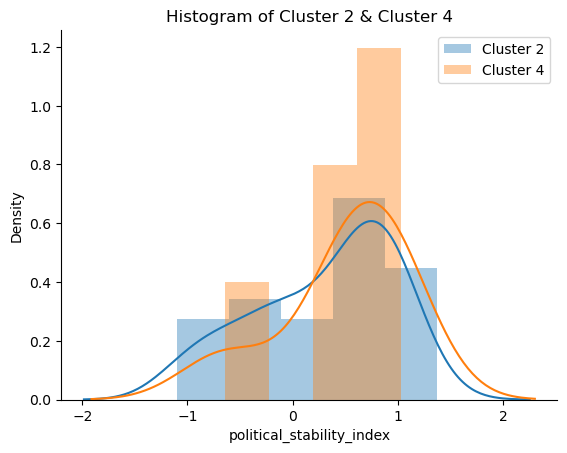

In [317]:
sns.distplot(p2, label ='Cluster 2')
sns.distplot(p4, label = 'Cluster 4')
plt.legend()
plt.title('Histogram of Cluster 2 & Cluster 4')
plt.xlabel('political_stability_index')
sns.despine()

In [318]:
from scipy import stats
result = stats.ttest_ind(p2,p4)
print(result)

TtestResult(statistic=-0.7006456463337482, pvalue=0.48610388379248937, df=63.0)


In [322]:
#### Check if the result is statistically significant (using a common significance level of 0.05)
if p_value < 0.05:
    print("There is a significant difference between the political stability index for the two clusters.")
else:
    print("There is no significant difference between political stability index  for the two clusters.")

There is no significant difference between political stability index  for the two clusters.


In [382]:
p4

Country
France                                                  0.37
Germany                                                 0.76
Japan                                                   1.03
Mexico                                                 -0.64
Netherlands (Kingdom of the)                            0.92
United Kingdom of Great Britain and Northern Ireland    0.54
Name: political_stability_index, dtype: float64